In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from dataProcesser import *
from dataImporter import *
from events import integrate
res = get_IC_data()
Ereco = 500*10**(np.linspace(0.0,1.3,14))
model = train_energy_resolution()
ztrue = np.linspace(-1,0,100)
interp_flux = interpolate_flux()
aeff_list = interpolate_aeff()

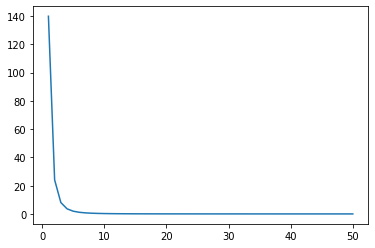

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from dataProcesser import *
from dataImporter import *
from events import integrate
aeff_df = get_aeff_df_dc()
from scipy.interpolate import interp1d
from dataProcesser import get_aeff_dc, interpolate_flux_DC

interp_flux = interpolate_flux_DC(False)
E_range = np.linspace(1,50)
plt.plot(E_range,get_flux('m',E_range,-1,interp_flux))

In [41]:
%matplotlib widget
flavor = 'm'
Etrue,_,_ = get_Etrue(E_index=0,npoints=25, left_alpha=0.95, right_alpha=0.99, model=model)
X,Y = np.meshgrid(Etrue,ztrue)
flux = get_flux(flavor,X,Y,interp_flux)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(X), Y, flux , cmap = 'winter')

#ax.scatter(np.log10(flux_df.GeV),(flux_df.z_min + flux_df.z_max)/2, flux_df.GeV**2*flux_df.m_flux,c='r',s=4)
ax.set_title(r'Interpolated average South Pole atmospheric $\nu_\mu$ flux with Honda data points')
ax.set_xlabel(r'$\log{}E_\nu \,[GeV]$')
ax.set_ylabel(r'$\cos{(\theta_z)}$')
ax.set_zlabel(r'$E_\nu^2\, \phi \, [GeV\,m^{-2}\, sec^{-1}\, sr^{-1}]$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, '$E_\\nu^2\\, \\phi \\, [GeV\\,m^{-2}\\, sec^{-1}\\, sr^{-1}]$')

In [48]:
%matplotlib widget
from dataProcesser import get_aeff, interpolate_aeff, get_Etrue


Etrue,_,_ = get_Etrue(E_index=0,npoints=25, left_alpha=0.95, right_alpha=0.99, model=model)

E_mesh, z_mesh = np.meshgrid(Etrue, ztrue)

aeff_num = get_aeff(False, E_mesh, z_mesh, aeff_list)
aeff_nuam = get_aeff(True, E_mesh, z_mesh, aeff_list)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(E_mesh), z_mesh, np.log10(aeff_num) , cmap = 'winter')
ax.set_title(r'Interpolated effective area [$m^2$]')
ax.set_xlabel(r'$\log{}E_\nu \,[GeV]$')
ax.set_ylabel(r'$\cos{(\theta_z)}$')
ax.set_zlabel(r'$A [m^2]$')
#plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, '$A [m^2]$')

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(E_mesh), z_mesh, aeff_num*flux , cmap = 'winter')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [40]:
%matplotlib widget
Etrue,mu_base_e,std_base_e = get_Etrue(E_index=0,npoints=25, left_alpha=0.95, right_alpha=0.99, model=model)

res_num = lognorm.pdf(Etrue, s = std_base_e, scale=np.exp(mu_base_e))

auc = integrate(res_num,'simps',Etrue)

fig = plt.figure()
plt.plot(Etrue,res_num)
plt.axvline(Ereco[0])
plt.axvline(Ereco[1])
plt.title(f'AUC: {np.round(auc,3)}')
plt.xscale('log')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
filename = '~/NuFSGenMC_nominal.dat'
df = pd.read_csv(filename, delimiter=' ', names= ['pdg', 'Ereco', 'zreco', 'Etrue', 'ztrue', 'mcweight', 'flux_pion', 'flux_kaon'], skiprows=12)
df['Ebin'] = pd.cut(df.Ereco, bins=500*10**np.linspace(0.0,1.3,14), labels=False).dropna()
num_mask = (df["pdg"] == 13)
nuam_mask = (df["pdg"] == -13)
pre_model = train_energy_resolution()
small_df = df[num_mask].query('Ereco >500').query('Ereco <9976').head(10000)
X_test = np.array(np.log(small_df.Ereco)).reshape(-1,1)
y_test = np.log(small_df.Etrue)

df_bin0 = small_df.query('Ebin==0.')[['Ereco','Etrue']]
Ereco = np.array(df_bin0.Ereco)
mu_base_e, std_base_e = pre_model.predict(X_test, return_std=True)


Etrue_rvs = lognorm.rvs(s=std_base_e, scale=np.exp(mu_base_e), random_state=0)
plt.figure()
plt.scatter(np.exp(X_test), np.exp(y_test),s=3, alpha=0.5, c='r', label='IC MC')
plt.scatter(np.exp(X_test), Etrue_rvs,s=3, alpha=0.5, c='black', label='My MC')
plt.scatter(np.exp(X_test),lognorm.ppf(1-0.999, s=std_base_e, scale= np.exp(mu_base_e)), c='grey', s=2, label='99.9 percentile')
plt.scatter(np.exp(X_test),lognorm.ppf(0.999, s=std_base_e, scale= np.exp(mu_base_e)), c='grey', s=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Ereco')
plt.ylabel('Etrue')
plt.xlim((np.exp(X_test).min(),np.exp(X_test).max()))
plt.ylim((np.exp(y_test).min(),np.exp(y_test).max()))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(201.19719999999995, 921243.9999999999)